In [89]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt 

In [90]:
df=pd.read_csv('insurance.csv')

In [91]:
df

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520
...,...,...,...,...,...,...,...
1333,50,male,30.970,3,no,northwest,10600.54830
1334,18,female,31.920,0,no,northeast,2205.98080
1335,18,female,36.850,0,no,southeast,1629.83350
1336,21,female,25.800,0,no,southwest,2007.94500


In [92]:
df['sex']=df['sex'].map({'male':0, 'female':1})
df

,age,sex,bmi,children,smoker,region,charges
0,19,1,27.900,0,yes,southwest,16884.92400
1,18,0,33.770,1,no,southeast,1725.55230
2,28,0,33.000,3,no,southeast,4449.46200
3,33,0,22.705,0,no,northwest,21984.47061
4,32,0,28.880,0,no,northwest,3866.85520
...,...,...,...,...,...,...,...
1333,50,0,30.970,3,no,northwest,10600.54830
1334,18,1,31.920,0,no,northeast,2205.98080
1335,18,1,36.850,0,no,southeast,1629.83350
1336,21,1,25.800,0,no,southwest,2007.94500


In [93]:
df['smoker']=df['smoker'].map({'yes':0, 'no':1})
df

,age,sex,bmi,children,smoker,region,charges
0,19,1,27.900,0,0,southwest,16884.92400
1,18,0,33.770,1,1,southeast,1725.55230
2,28,0,33.000,3,1,southeast,4449.46200
3,33,0,22.705,0,1,northwest,21984.47061
4,32,0,28.880,0,1,northwest,3866.85520
...,...,...,...,...,...,...,...
1333,50,0,30.970,3,1,northwest,10600.54830
1334,18,1,31.920,0,1,northeast,2205.98080
1335,18,1,36.850,0,1,southeast,1629.83350
1336,21,1,25.800,0,1,southwest,2007.94500


In [94]:
df = pd.get_dummies(df, columns=['region'], drop_first=True)

In [95]:
df

,age,sex,bmi,children,smoker,charges,region_northwest,region_southeast,region_southwest
0,19,1,27.900,0,0,16884.92400,0,0,1
1,18,0,33.770,1,1,1725.55230,0,1,0
2,28,0,33.000,3,1,4449.46200,0,1,0
3,33,0,22.705,0,1,21984.47061,1,0,0
4,32,0,28.880,0,1,3866.85520,1,0,0
...,...,...,...,...,...,...,...,...,...
1333,50,0,30.970,3,1,10600.54830,1,0,0
1334,18,1,31.920,0,1,2205.98080,0,0,0
1335,18,1,36.850,0,1,1629.83350,0,1,0
1336,21,1,25.800,0,1,2007.94500,0,0,1


In [96]:
X=df.drop(['charges'], axis=1).values
y=df['charges'].values

In [97]:
from sklearn.model_selection import train_test_split

In [98]:
X_train, X_test, y_train, y_test= train_test_split(X,y, random_state=42)

In [99]:
# importam cele 4 modele
from sklearn.linear_model import LinearRegression
from sklearn.neighbors import KNeighborsRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor

In [100]:
from sklearn.metrics import mean_absolute_error

In [101]:
# modelul LinearRegression ------------------------------------
linear=LinearRegression()
linear.fit(X_train, y_train)
#facem predictia si calculam eroarea pentru modelul LinearRegression
y_pred=linear.predict(X_test)
mean_absolute_error(y_pred, y_test)

4243.654116653135

In [102]:
# KNN cum lucreaza pe regresie-----------------------------------
knn=KNeighborsRegressor()
knn.fit(X_train, y_train)
#facem predictia si calculam eroarea pentru modelul KNN
y_pred=knn.predict(X_test)
mean_absolute_error(y_pred, y_test)

7411.200980922388

In [103]:
# modelul Tree -----------------------------------------------
tree=DecisionTreeRegressor()
tree.fit(X_train, y_train)
#facem predictia si calculam eroarea pentru modelul Tree
y_pred=tree.predict(X_test)
mean_absolute_error(y_pred, y_test)

2731.80648278806

In [104]:
# modelul Forest ---------------------------------------------
forest=RandomForestRegressor()
forest.fit(X_train, y_train)
#facem predictia si calculam eroarea pentru modelul Forest
y_pred=forest.predict(X_test)
mean_absolute_error(y_pred, y_test)

2670.4075152184078

In [105]:
df

,age,sex,bmi,children,smoker,charges,region_northwest,region_southeast,region_southwest
0,19,1,27.900,0,0,16884.92400,0,0,1
1,18,0,33.770,1,1,1725.55230,0,1,0
2,28,0,33.000,3,1,4449.46200,0,1,0
3,33,0,22.705,0,1,21984.47061,1,0,0
4,32,0,28.880,0,1,3866.85520,1,0,0
...,...,...,...,...,...,...,...,...,...
1333,50,0,30.970,3,1,10600.54830,1,0,0
1334,18,1,31.920,0,1,2205.98080,0,0,0
1335,18,1,36.850,0,1,1629.83350,0,1,0
1336,21,1,25.800,0,1,2007.94500,0,0,1


In [106]:
# realizarea graficilor pentru cele 4 modele utilizand urmatoaea functie
def plot_reg(X, y, algo):
    X_train,X_test,y_train,y_test=train_test_split(X,y, random_state=42)
    algo.fit(X_train, y_train)
    y_pred=algo.predict(X_test)
    plt.scatter(X_test.reshape(-1,1), y_test)
    x_min, x_max = np.min(X_test), np.max(X_test)
    X_pred=np.linspace(x_min,x_max,100)
    plt.plot(X_pred, algo.predict(X_pred.reshape(-1,1)),c='red')
    plt.show()

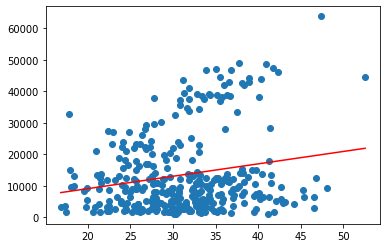

In [107]:
plot_reg(df[['bmi']].values, y, linear)

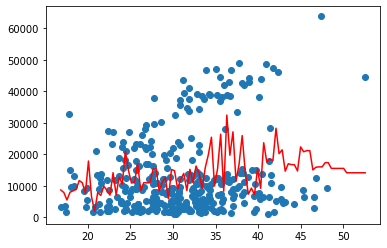

In [108]:
plot_reg(df[['bmi']].values, y, knn)

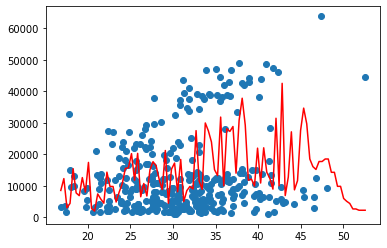

In [109]:
plot_reg(df[['bmi']].values, y, forest)

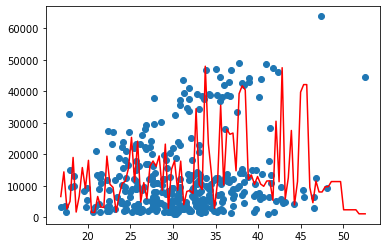

In [110]:
plot_reg(df[['bmi']].values, y, tree)